<a href="https://colab.research.google.com/github/m5532m5532/hw2_M10921008/blob/main/code/%E4%BD%9C%E6%A5%AD%E4%BA%8C_adult_%E9%9A%A8%E6%A9%9F%E6%A3%AE%E6%9E%97.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 隨機森林

## 訓練

In [85]:
import numpy as np
import pandas as pd
from sklearn import ensemble, preprocessing, metrics

In [86]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [87]:
df_6 = pd.read_csv("/content/drive/My Drive/colab/Colab Notebooks/資料探勘作業一/AdultsDataSet_Finaltrain.csv")
df_6

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,5,77516,2,13,4,0,1,4,1,2174,0,40,38,0
1,50,4,83311,2,13,2,3,0,4,1,0,0,13,38,0
2,38,2,215646,0,9,0,5,1,4,1,0,0,40,38,0
3,53,2,234721,5,7,2,5,0,2,1,0,0,40,38,0
4,28,2,338409,2,13,2,9,5,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30157,27,2,257302,6,12,2,12,5,4,0,0,0,38,38,0
30158,40,2,154374,0,9,2,6,0,4,1,0,0,40,38,1
30159,58,2,151910,0,9,6,0,4,4,0,0,0,40,38,0
30160,22,2,201490,0,9,4,0,3,4,1,0,0,20,38,0


In [88]:
# normalize
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_7 = scaler.fit_transform(df_6)
df_8 = pd.DataFrame(df_7,columns=df_6.columns)
df_8

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,0.301370,0.833333,0.043338,0.133333,0.800000,0.666667,0.000000,0.2,1.0,1.0,0.021740,0.0,0.397959,0.95,0.0
1,0.452055,0.666667,0.047277,0.133333,0.800000,0.333333,0.230769,0.0,1.0,1.0,0.000000,0.0,0.122449,0.95,0.0
2,0.287671,0.333333,0.137244,0.000000,0.533333,0.000000,0.384615,0.2,1.0,1.0,0.000000,0.0,0.397959,0.95,0.0
3,0.493151,0.333333,0.150212,0.333333,0.400000,0.333333,0.384615,0.0,0.5,1.0,0.000000,0.0,0.397959,0.95,0.0
4,0.150685,0.333333,0.220703,0.133333,0.800000,0.333333,0.692308,1.0,0.5,0.0,0.000000,0.0,0.397959,0.10,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30157,0.136986,0.333333,0.165563,0.400000,0.733333,0.333333,0.923077,1.0,1.0,0.0,0.000000,0.0,0.377551,0.95,0.0
30158,0.315068,0.333333,0.095589,0.000000,0.533333,0.333333,0.461538,0.0,1.0,1.0,0.000000,0.0,0.397959,0.95,1.0
30159,0.561644,0.333333,0.093914,0.000000,0.533333,1.000000,0.000000,0.8,1.0,0.0,0.000000,0.0,0.397959,0.95,0.0
30160,0.068493,0.333333,0.127620,0.000000,0.533333,0.666667,0.000000,0.6,1.0,1.0,0.000000,0.0,0.193878,0.95,0.0


In [89]:
df_8.describe()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
count,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000
mean,0.293670,0.366554,0.119669,0.161278,0.608087,0.430022,0.458450,0.283668,0.919651,0.675685,0.010920,0.020288,0.407462,0.909564,0.248922
std,0.179927,0.158987,0.071827,0.210821,0.170000,0.249669,0.309967,0.320268,0.208677,0.468126,0.074064,0.092814,0.122245,0.152634,0.432396
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.150685,0.333333,0.070607,0.000000,0.533333,0.333333,0.153846,0.000000,1.000000,0.000000,0.000000,0.000000,0.397959,0.950000,0.000000
50%,0.273973,0.333333,0.111940,0.066667,0.600000,0.333333,0.461538,0.200000,1.000000,1.000000,0.000000,0.000000,0.397959,0.950000,0.000000
75%,0.410959,0.333333,0.152188,0.200000,0.800000,0.666667,0.692308,0.600000,1.000000,1.000000,0.000000,0.000000,0.448980,0.950000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [90]:
train_X = df_8.drop('hours_per_week', axis=1)
train_y = df_8['hours_per_week']

In [91]:
from sklearn.ensemble import RandomForestRegressor
# 建立 random forest 模型
rf = RandomForestRegressor(n_estimators = 100,
                           n_jobs = -1,
                           oob_score = True,
                           bootstrap = True,
                           random_state = 42)
rf.fit(train_X, train_y)
# 預測
train_y_predicted = rf.predict(train_X)

In [92]:
print('R^2 Training Score: {:.2f} \nOOB Score: {:.2f} \nR^2 Validation Score: {:.2f}'.format(rf.score(X_train, y_train),rf.oob_score_,rf.score(X_train, y_train)))

R^2 Training Score: -11.51 
OOB Score: 0.18 
R^2 Validation Score: -11.51


In [93]:
rf.feature_importances_

array([0.27669108, 0.04737883, 0.29223031, 0.04285355, 0.06298389,
       0.029487  , 0.07733799, 0.03211824, 0.02016921, 0.04030519,
       0.02234319, 0.01525857, 0.02039349, 0.02044948])

In [94]:
df_feature=train_X.columns
df_important = pd.DataFrame(index=df_feature)
df_important['values'] = forest_fit.feature_importances_

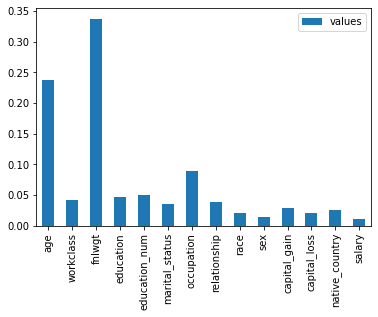

In [95]:
df_important.plot.bar()

## 測試

In [96]:
df_t = pd.read_csv("/content/drive/My Drive/colab/Colab Notebooks/AdultsDataSet_test.csv")
df_t

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
16277,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K.
16278,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
16279,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [97]:
print("資料屬性:",df_t.dtypes)
print("資料屬性workclass:",df_t['workclass'].value_counts())
print("資料屬性education:",df_t['education'].value_counts())
print("資料屬性marital_status:",df_t['marital_status'].value_counts())
print("資料屬性occupation:",df_t['occupation'].value_counts())
print("資料屬性relationship:",df_t['relationship'].value_counts())
print("資料屬性race:",df_t['race'].value_counts())
print("資料屬性sex:",df_t['sex'].value_counts())
print("資料屬性native_country:",df_t['native_country'].value_counts())

資料屬性: age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
salary            object
dtype: object
資料屬性workclass:  Private             11210
 Self-emp-not-inc     1321
 Local-gov            1043
 ?                     963
 State-gov             683
 Self-emp-inc          579
 Federal-gov           472
 Without-pay             7
 Never-worked            3
Name: workclass, dtype: int64
資料屬性education:  HS-grad         5283
 Some-college    3587
 Bachelors       2670
 Masters          934
 Assoc-voc        679
 11th             637
 Assoc-acdm       534
 10th             456
 7th-8th          309
 Prof-school      258
 9th              242
 12th             224
 Doctorate        181
 5th-6th        

In [98]:
fliter1 = (df_t["native_country"] != ' ?')
fliter2 = (df_t["occupation"] != ' ?')
fliter3 = (df_t["workclass"] != ' ?')
df_t1 = df_t[fliter1 & fliter2 & fliter3]
print(df_t1['native_country'].value_counts())
print(df_t1['occupation'].value_counts())
print(df_t1['workclass'].value_counts())

 United-States                 13788
 Mexico                          293
 Philippines                      95
 Puerto-Rico                      66
 Germany                          65
 Canada                           56
 El-Salvador                      47
 India                            47
 China                            45
 Cuba                             41
 England                          33
 Italy                            32
 Dominican-Republic               30
 South                            30
 Japan                            30
 Portugal                         28
 Haiti                            27
 Columbia                         26
 Poland                           25
 Guatemala                        23
 Jamaica                          23
 Greece                           20
 Vietnam                          19
 Ecuador                          16
 Peru                             15
 Nicaragua                        15
 Iran                             14
 

In [99]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df_t2 = df_t1
df_t2['workclass'] = labelencoder.fit_transform(df_t1['workclass'])
df_t2['occupation'] = labelencoder.fit_transform(df_t1['occupation'])
df_t2['marital_status'] = labelencoder.fit_transform(df_t1['marital_status'])
df_t2['relationship'] = labelencoder.fit_transform(df_t1['relationship'])
df_t2['race'] = labelencoder.fit_transform(df_t1['race'])
df_t2['sex'] = labelencoder.fit_transform(df_t1['sex'])
df_t2['native_country'] = labelencoder.fit_transform(df_t1['native_country'])
df_t2['salary'] = labelencoder.fit_transform(df_t2['salary'])
df_t2

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,25,2,226802,11th,7,4,6,3,2,1,0,0,40,37,0
1,38,2,89814,HS-grad,9,2,4,0,4,1,0,0,50,37,0
2,28,1,336951,Assoc-acdm,12,2,10,0,4,1,0,0,40,37,1
3,44,2,160323,Some-college,10,2,6,0,2,1,7688,0,40,37,1
5,34,2,198693,10th,6,4,7,1,4,1,0,0,30,37,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16275,33,2,245211,Bachelors,13,4,9,3,4,1,0,0,40,37,0
16276,39,2,215419,Bachelors,13,0,9,1,4,0,0,0,36,37,0
16278,38,2,374983,Bachelors,13,2,9,0,4,1,0,0,50,37,0
16279,44,2,83891,Bachelors,13,0,0,3,1,1,5455,0,40,37,0


In [100]:
replace_values = {' HS-grad' : 0, ' Some-college' : 1, ' Bachelors' : 2, ' Masters' : 3, ' Assoc-voc' : 4, ' 11th' : 5
                 , ' Assoc-acdm' : 6, ' 10th' : 7, ' 7th-8th' : 8, ' Prof-school' : 9, ' 9th' : 10, ' 12th' : 11
                 , ' Doctorate' : 12, ' 5th-6th' : 13, ' 1st-4th' : 14, ' Preschool' : 15}                                                                                          

df_t2=df_t2.replace({"education": replace_values})  


print(df_t2['education'].value_counts())

0     4943
1     3221
2     2526
3      887
4      652
5      571
6      499
7      403
8      266
9      243
10     221
11     200
12     169
13     161
14      71
15      27
Name: education, dtype: int64


In [101]:
df_t2.describe()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
count,15060.000000,15060.000000,1.506000e+04,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000
mean,38.768327,2.214874,1.896164e+05,2.420784,10.112749,2.595286,5.989044,1.401394,3.683665,0.673772,1120.301594,89.041899,40.951594,35.467596,0.245684
std,13.380676,0.966422,1.056150e+05,3.156229,2.558727,1.505336,4.020113,1.588954,0.827630,0.468848,7703.181842,406.283245,12.062831,5.880922,0.430506
min,17.000000,0.000000,1.349200e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,2.000000,1.166550e+05,0.000000,9.000000,2.000000,2.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,37.000000,0.000000
50%,37.000000,2.000000,1.779550e+05,1.000000,10.000000,2.000000,6.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,37.000000,0.000000
75%,48.000000,2.000000,2.385888e+05,3.000000,13.000000,4.000000,9.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,37.000000,0.000000
max,90.000000,6.000000,1.490400e+06,15.000000,16.000000,6.000000,13.000000,5.000000,4.000000,1.000000,99999.000000,3770.000000,99.000000,39.000000,1.000000


In [102]:
df_t2.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'salary'],
      dtype='object')

In [103]:
df_t2.to_csv("/content/drive/My Drive/colab/Colab Notebooks/資料探勘作業一/AdultsDataSet_Finaltest.csv",index=False)

## 驗證

In [104]:
df_test = pd.read_csv("/content/drive/My Drive/colab/Colab Notebooks/資料探勘作業一/AdultsDataSet_Finaltest.csv")

In [105]:
# normalize
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_test1 = scaler.fit_transform(df_test)
df_test2 = pd.DataFrame(df_test1,columns=df_6.columns)
df_test2

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,0.109589,0.333333,0.144430,0.333333,0.400000,0.666667,0.461538,0.6,0.50,1.0,0.000000,0.0,0.397959,0.948718,0.0
1,0.287671,0.333333,0.051677,0.000000,0.533333,0.333333,0.307692,0.0,1.00,1.0,0.000000,0.0,0.500000,0.948718,0.0
2,0.150685,0.166667,0.219011,0.400000,0.733333,0.333333,0.769231,0.0,1.00,1.0,0.000000,0.0,0.397959,0.948718,1.0
3,0.369863,0.333333,0.099418,0.066667,0.600000,0.333333,0.461538,0.0,0.50,1.0,0.076881,0.0,0.397959,0.948718,1.0
4,0.232877,0.333333,0.125398,0.466667,0.333333,0.666667,0.538462,0.2,1.00,1.0,0.000000,0.0,0.295918,0.948718,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,0.219178,0.333333,0.156895,0.133333,0.800000,0.666667,0.692308,0.6,1.00,1.0,0.000000,0.0,0.397959,0.948718,0.0
15056,0.301370,0.333333,0.136723,0.133333,0.800000,0.000000,0.692308,0.2,1.00,0.0,0.000000,0.0,0.357143,0.948718,0.0
15057,0.287671,0.333333,0.244762,0.133333,0.800000,0.333333,0.692308,0.0,1.00,1.0,0.000000,0.0,0.500000,0.948718,0.0
15058,0.369863,0.333333,0.047666,0.133333,0.800000,0.000000,0.000000,0.6,0.25,1.0,0.054551,0.0,0.397959,0.948718,0.0


In [106]:
df_test2.describe()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
count,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000
mean,0.298196,0.369146,0.119252,0.161386,0.607517,0.432548,0.460696,0.280279,0.920916,0.673772,0.011203,0.023619,0.407669,0.909426,0.245684
std,0.183297,0.161070,0.071511,0.210415,0.170582,0.250889,0.309239,0.317791,0.206907,0.468848,0.077033,0.107767,0.123090,0.150793,0.430506
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.150685,0.333333,0.069851,0.000000,0.533333,0.333333,0.153846,0.000000,1.000000,0.000000,0.000000,0.000000,0.397959,0.948718,0.000000
50%,0.273973,0.333333,0.111356,0.066667,0.600000,0.333333,0.461538,0.200000,1.000000,1.000000,0.000000,0.000000,0.397959,0.948718,0.000000
75%,0.424658,0.333333,0.152411,0.200000,0.800000,0.666667,0.692308,0.600000,1.000000,1.000000,0.000000,0.000000,0.448980,0.948718,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [107]:
df_test_X = df_test2.drop('hours_per_week', axis=1)
df_test_y = df_test2['hours_per_week']

In [108]:
# 預測
df_test_y_predicted = rf.predict(df_test_X)

In [109]:
from sklearn.metrics import mean_squared_error
print('RMSE为：',np.sqrt(mean_squared_error(df_test_y,df_test_y_predicted)))

RMSE为： 0.11065652089934708


In [110]:
pip install scipy

In [111]:
import scipy
import sklearn
from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_absolute_percentage_error
print('MAPE为：',mean_squared_error(df_test_y,df_test_y_predicted))

MAPE为： 0.012244865617547635
